# K-Means Clustring On INCOME Dataset

In [1]:
##Importing the packages
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.cluster import KMeans

In [2]:
#Import Income dataset
data = pd.read_csv('income.csv')

In [3]:
data.head() #Display first 5 rows of the data

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


### Exploratory Data Analysis (EDA)

In [4]:
#Find the size of the data Rows x Columns
data.shape

(22, 3)

The data consists of 22 rows and 3 columns

In [5]:
#Find Basic Statistics like count, mean, standard deviation, min, max etc.
data.describe()

,Age,Income($)
count,22.000000,22.000000
mean,34.818182,90431.818182
std,5.901060,43505.964412
min,26.000000,45000.000000
25%,29.000000,58500.000000
50%,36.500000,67500.000000
75%,39.750000,135250.000000
max,43.000000,162000.000000


- Count of 22 for all the fields indicates that there are no missing values in any of the field
- Minimum(min) and Maximum(max) defines the range of values for that field.
- Mean(mean) indicates average of all the values in the field. There is large variation of mean values of the fields so we need to scale the data.
- 25%, 50%, 75% percentiles indicates the distribution of data

In [6]:
#Find the the information about the fields, field datatypes and Null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Name       22 non-null     object
 1   Age        22 non-null     int64 
 2   Income($)  22 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 656.0+ bytes


Info fuction is used to list all the field names, their datatypes, count of elements in the field and if the field contacts Null values.

Text(0, 0.5, 'Income($)')

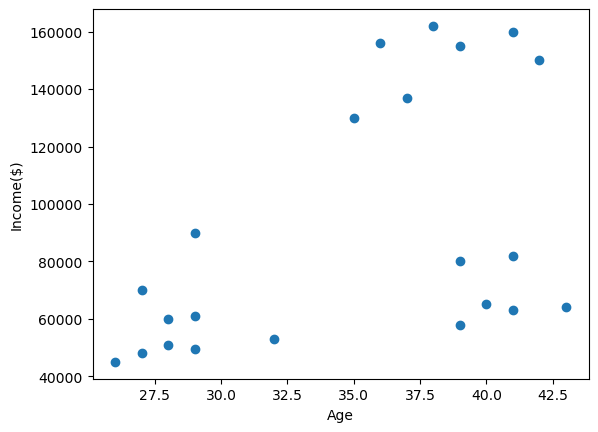

In [7]:
# Plotting Raw Data as Scatter Plot
plt.scatter(data.Age,data['Income($)'])
plt.xlabel('Age')
plt.ylabel('Income($)')

In [8]:
km = KMeans(n_clusters=3) # Using sklearn.cluster KMeans we predict the output
y_predicted = km.fit_predict(data[['Age','Income($)']])
y_predicted

array([2, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1])

In [9]:
data['cluster']=y_predicted
data.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,1
3,Ismail,28,60000,1
4,Kory,42,150000,0


In [10]:
km.cluster_centers_ # will not be the means of the points in each cluster.

array([[3.82857143e+01, 1.50000000e+05],
       [3.29090909e+01, 5.61363636e+04],
       [3.40000000e+01, 8.05000000e+04]])

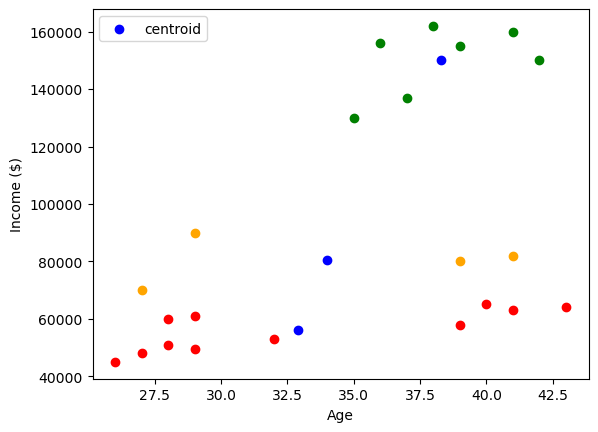

In [11]:
d1 = data[data.cluster==0]
d2 = data[data.cluster==1]
d3 = data[data.cluster==2]
plt.scatter(d1.Age,d1['Income($)'],color='green')
plt.scatter(d2.Age,d2['Income($)'],color='red')
plt.scatter(d3.Age,d3['Income($)'],color='orange')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='Blue',marker='o',label='centroid')
plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.legend()

# Preprocessing using Min Max Scaler

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [13]:
# Fitting data to Scale and transform
scaler.fit(data[['Income($)']])
data['Income($)'] = scaler.transform(data[['Income($)']])

scaler.fit(data[['Age']])
data['Age'] = scaler.transform(data[['Age']])

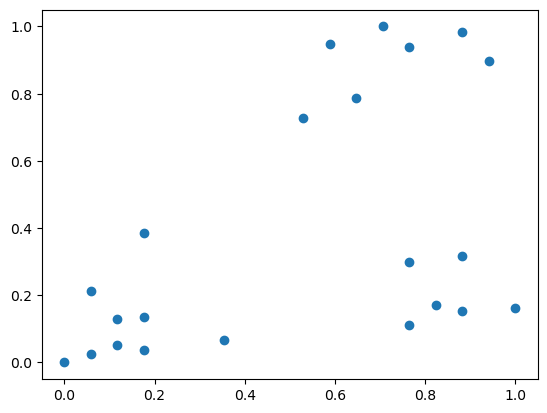

In [14]:
# Plot Scatter Plot After Preprocessing
plt.scatter(data.Age,data['Income($)'])

In [15]:
km = KMeans(n_clusters=3) # Using sklearn.cluster KMeans we predict the output
y_predicted = km.fit_predict(data[['Age','Income($)']])
y_predicted

array([0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [16]:
data['cluster']=y_predicted
data.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,2


In [17]:
km.cluster_centers_ # will not be the means of the points in each cluster.

array([[0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ],
       [0.72268908, 0.8974359 ]])

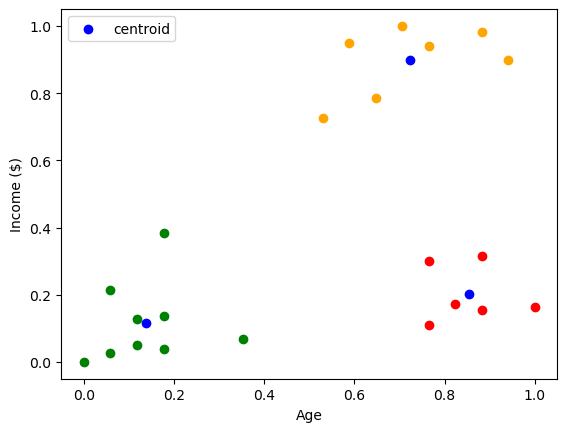

In [18]:
d1 = data[data.cluster==0]
d2 = data[data.cluster==1]
d3 = data[data.cluster==2]
plt.scatter(d1.Age,d1['Income($)'],color='green')
plt.scatter(d2.Age,d2['Income($)'],color='red')
plt.scatter(d3.Age,d3['Income($)'],color='orange')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='Blue',marker='o',label='centroid') # Plotting Blue Centroid
plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.legend()